# Open Trust Fabric (OTF)
# Digital Platform Use Case
# 02-DescriptiveAnalysis
June 2021

# Description

This notebook provides a descriptive analysis of the Digital Platform contract data developed for Use Case 1 of the Ecosystem of Contracts project. The data presented here represents digital platform contracts organised according to OTF data map.

#### Accounting and modelling
The measures that we will monitor over time are: 
- Number of reviews (proxy for contracts/use) 
- Price 
- Occupancy
- Value (price * occupancy)
- Listing rating (overall score)

#### Measuring intangibles

In this notebook, we address the first step in analysing intangibles, namely:

1) Descriptive analysis of the number of contracts and their characterisation, performance and KPIs in general: time-series analysis of the **number of contracts** to identify potential autocorrelation resulting from the role held in the contract network; 

In [2]:
# Import python libraries and set-up
import pandas as pd
import numpy as np
import os
import gzip
from functools import reduce

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [3]:
# Link to data path
data_path = 'data/'

In [4]:
# List cleaned datasets
os.listdir(data_path)

['CONTRACT_ASSET.csv.gzip',
 '.DS_Store',
 'EVENTS_DOMAIN_FEATURE.csv.gzip',
 'ASSETS_DOMAIN_FEATURE.csv.gzip',
 'POLICY_NETWORK.csv.gzip',
 'PARTIES_DOMAIN_FEATURE.csv.gzip',
 'CONTRACT_PARTIES.csv.gzip',
 'CONTRACT_EVENTS.pkl',
 'CONTRACT_EVENTS.csv.gzip']

In [6]:
# Open policy network
with gzip.open(os.path.join(data_path, 'POLICY_NETWORK.csv.gzip')) as file_in:
    df = pd.read_csv(file_in, low_memory=False)

In [7]:
# Check data dimension
df.shape

(6640646, 13)

In [8]:
# Check data types
df.dtypes

MODEL_INSTANCE                    object
TIME_STAMP                        object
PARTIES_PROPOSER_ID                int64
PARTIES_PARTICIPANT_ID             int64
ASSET_ID                           int64
ASSET_PRICE                       object
ASSET_MIGRATION                  float64
ASSET_LOCATION                    object
ASSETS_REVIEW_SCORES_ACCURACY    float64
ASSET_NUMBER_REVIEWS             float64
ASSET_AVAILABILITY_30            float64
YEAR                               int64
MONTH                              int64
dtype: object

In [9]:
# Check missing values (%)
df.isnull().sum()/len(df) * 100

MODEL_INSTANCE                    0.000000
TIME_STAMP                        0.000000
PARTIES_PROPOSER_ID               0.000000
PARTIES_PARTICIPANT_ID            0.000000
ASSET_ID                          0.000000
ASSET_PRICE                      83.287002
ASSET_MIGRATION                  83.287002
ASSET_LOCATION                   83.287002
ASSETS_REVIEW_SCORES_ACCURACY    83.287002
ASSET_NUMBER_REVIEWS             83.287002
ASSET_AVAILABILITY_30            83.287002
YEAR                              0.000000
MONTH                             0.000000
dtype: float64

As indicated above, the assets dataset contains an high number of missing values. This represents a limitation of the data source.

- **MODEL_INSTANCE** --> contract id
- **PARTIES_PROPOSER_ID** --> host id
- **PARTIES_PARTICIPANT_ID** --> guest id
- **ASSET_ID** --> B&B id

In [10]:
df.head()

,MODEL_INSTANCE,TIME_STAMP,PARTIES_PROPOSER_ID,PARTIES_PARTICIPANT_ID,ASSET_ID,ASSET_PRICE,ASSET_MIGRATION,ASSET_LOCATION,ASSETS_REVIEW_SCORES_ACCURACY,ASSET_NUMBER_REVIEWS,ASSET_AVAILABILITY_30,YEAR,MONTH
0,PJNs4Fpyg4,2015-04-10,62142,30537860,15883,NaN,NaN,NaN,NaN,NaN,NaN,2015,4
1,rGvohKWuaC,2016-06-19,62142,37529754,15883,$85.00,0.0,vienna,10.0,1.0,9.0,2016,6
2,O1ZE3GDKxL,2016-07-29,62142,3147341,15883,$85.00,0.0,vienna,10.0,2.0,17.0,2016,7
3,2t2vxoLsH5,2016-08-13,62142,29518067,15883,$85.00,0.0,vienna,9.0,3.0,9.0,2016,8
4,KBHJiEPuFf,2016-11-21,62142,36016357,15883,$85.00,0.0,vienna,10.0,4.0,9.0,2016,11


#### Extra cleaning

In [11]:
# ASSET_PRICE
def fix_price (value):
    try:
        value = value.replace("$", '').replace(",", '')
        value = float(value)
        return value
    except: return np.nan  

df['ASSET_PRICE'] = df['ASSET_PRICE'].apply(lambda x : fix_price(x))

# We clean the way price is reported removing special values

In [12]:
# Convert currency to euro

# czech republic, prague = CZK
# Denmark, copenhagen = DKK 
# sweden, stockholm = KR

# CZK TO EURO --> 0.039
# df_gb_flat.loc[df_gb_flat.ASSET_LOCATION=='prague', "ASSET_PRICE"] = df_gb_flat.loc[df_gb_flat.ASSET_LOCATION=='prague', "ASSET_PRICE"] * 0.039
df.loc[df.ASSET_LOCATION=='prague', "ASSET_PRICE"] = df.loc[df.ASSET_LOCATION=='prague', "ASSET_PRICE"] * 0.039

# DKK TO EURO --> 0.13
# df_gb_flat.loc[df_gb_flat.ASSET_LOCATION=='copenhagen', "ASSET_PRICE"] = df_gb_flat.loc[df_gb_flat.ASSET_LOCATION=='copenhagen', "ASSET_PRICE"] * 0.13
df.loc[df.ASSET_LOCATION=='copenhagen', "ASSET_PRICE"] = df.loc[df.ASSET_LOCATION=='copenhagen', "ASSET_PRICE"] * 0.13

# KR TO EURO --> 0.099
# df_gb_flat.loc[df_gb_flat.ASSET_LOCATION=='stockholm', "ASSET_PRICE"] = df_gb_flat.loc[df_gb_flat.ASSET_LOCATION=='stockholm', "ASSET_PRICE"] * 0.099
df.loc[df.ASSET_LOCATION=='stockholm', "ASSET_PRICE"] = df.loc[df.ASSET_LOCATION=='stockholm', "ASSET_PRICE"] * 0.099


#### Exploration -  Contracts

This section explores the following dimensions per city and over time:
- number of proposers
- participants
- assets
- number of contracts

#### Exploration -  Contracts policy variables

This section explores the following dimensions per city and over time:
- number of contracts (proxy for contracts/use)
- price
- occupancy
- value (price * occupancy)
- listing rating (overall score)

#### Exploration -  Top level

In [14]:
df.head()

,MODEL_INSTANCE,TIME_STAMP,PARTIES_PROPOSER_ID,PARTIES_PARTICIPANT_ID,ASSET_ID,ASSET_PRICE,ASSET_MIGRATION,ASSET_LOCATION,ASSETS_REVIEW_SCORES_ACCURACY,ASSET_NUMBER_REVIEWS,ASSET_AVAILABILITY_30,YEAR,MONTH
0,PJNs4Fpyg4,2015-04-10,62142,30537860,15883,NaN,NaN,NaN,NaN,NaN,NaN,2015,4
1,rGvohKWuaC,2016-06-19,62142,37529754,15883,85.0,0.0,vienna,10.0,1.0,9.0,2016,6
2,O1ZE3GDKxL,2016-07-29,62142,3147341,15883,85.0,0.0,vienna,10.0,2.0,17.0,2016,7
3,2t2vxoLsH5,2016-08-13,62142,29518067,15883,85.0,0.0,vienna,9.0,3.0,9.0,2016,8
4,KBHJiEPuFf,2016-11-21,62142,36016357,15883,85.0,0.0,vienna,10.0,4.0,9.0,2016,11


#### Exploration -  Number of contracts

In [15]:
# Count contracts per city over time
df_location_cont = pd.pivot_table(data = df,
                                  index=['YEAR'],
                                  columns = ["ASSET_LOCATION"],
                                  values=["MODEL_INSTANCE"], 
                                  aggfunc="count",
                                  )

df_location_cont.columns = [col[1] for col in df_location_cont.columns]

In [16]:
df_location_cont

,amsterdam,athens,brussels,copenhagen,dublin,lisbon,madrid,prague,rome,stockholm,vienna
YEAR,,,,,,,,,,,
2015,6380.0,781.0,746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1604.0
2016,19907.0,NaN,NaN,962.0,1770.0,NaN,NaN,NaN,NaN,NaN,16804.0
2017,30632.0,3048.0,1301.0,1429.0,691.0,NaN,NaN,NaN,12648.0,NaN,17739.0
2018,41569.0,27898.0,9410.0,5861.0,12021.0,57344.0,68985.0,27431.0,96537.0,1271.0,43247.0
2019,11532.0,60163.0,30219.0,19826.0,17216.0,106054.0,112638.0,63514.0,42350.0,NaN,34793.0
2020,3511.0,15278.0,10064.0,4359.0,222.0,10862.0,33543.0,8386.0,NaN,NaN,17305.0


The table above shows the number of contracts per city per year. The table shows a considerable variation in the number of contracts across cities and over time. In addition, the table indicates a significant number of missing values.

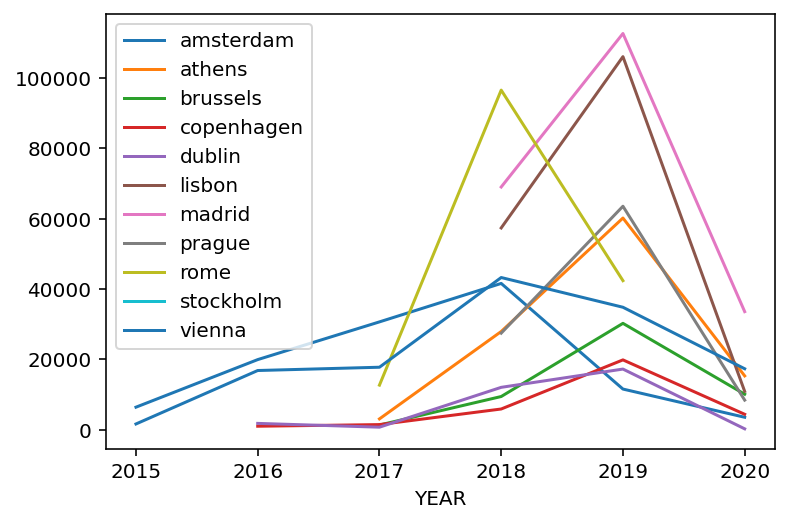

In [17]:
contract_over_time = df_location_cont.plot()

The table above reports the number of contracts over time reported in a time series format. The figure shows a high variation in the number of contracts across cities and over time.

#### Exploration -  Price

In [18]:
df.groupby("ASSET_LOCATION").describe()["ASSET_PRICE"]

,count,mean,std,min,25%,50%,75%,max
ASSET_LOCATION,,,,,,,,
amsterdam,113531.0,128.247060,105.899823,8.000,85.0000,109.000,149.0000,9000.000
athens,107168.0,54.036401,39.541931,9.000,31.0000,45.000,62.0000,810.000
brussels,51740.0,71.704581,44.090542,0.000,48.0000,65.000,84.0000,777.000
copenhagen,32437.0,131.271805,129.951789,9.100,64.7400,98.020,155.7400,6500.260
dublin,31920.0,111.287876,114.656181,20.000,57.0000,90.000,130.0000,4690.000
lisbon,174260.0,78.316412,52.508305,0.000,50.0000,67.000,94.0000,2300.000
madrid,215166.0,77.984830,83.048630,9.000,45.0000,65.000,90.0000,8000.000
prague,99331.0,133.038507,604.137887,7.995,39.3510,58.695,94.6140,15600.039
rome,151535.0,93.313004,83.815344,0.000,55.0000,78.000,109.0000,9021.000


The table above represents the descriptive statistics of price per city. The table shows considerable variation in the average price across cities and over time.

#### Exploration -  Occupancy

We check average occupancy rate per city across years

In [19]:
df.head()

,MODEL_INSTANCE,TIME_STAMP,PARTIES_PROPOSER_ID,PARTIES_PARTICIPANT_ID,ASSET_ID,ASSET_PRICE,ASSET_MIGRATION,ASSET_LOCATION,ASSETS_REVIEW_SCORES_ACCURACY,ASSET_NUMBER_REVIEWS,ASSET_AVAILABILITY_30,YEAR,MONTH
0,PJNs4Fpyg4,2015-04-10,62142,30537860,15883,NaN,NaN,NaN,NaN,NaN,NaN,2015,4
1,rGvohKWuaC,2016-06-19,62142,37529754,15883,85.0,0.0,vienna,10.0,1.0,9.0,2016,6
2,O1ZE3GDKxL,2016-07-29,62142,3147341,15883,85.0,0.0,vienna,10.0,2.0,17.0,2016,7
3,2t2vxoLsH5,2016-08-13,62142,29518067,15883,85.0,0.0,vienna,9.0,3.0,9.0,2016,8
4,KBHJiEPuFf,2016-11-21,62142,36016357,15883,85.0,0.0,vienna,10.0,4.0,9.0,2016,11


In [20]:
# Average availability per city over time
df_availability_avg = pd.pivot_table(data = df,
                                  index=['YEAR'],
                                  columns = ["ASSET_LOCATION"],
                                  values=["ASSET_AVAILABILITY_30"], 
                                  aggfunc="mean",
                                  )

df_availability_avg.columns = [col[1] for col in df_availability_avg.columns]

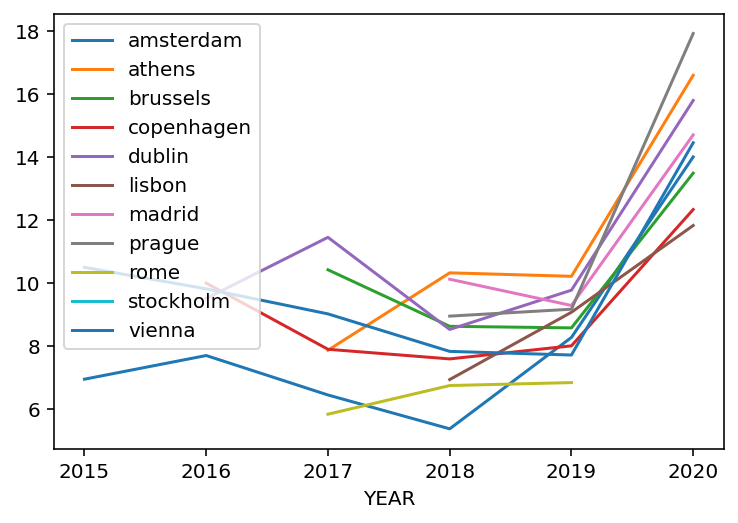

In [21]:
average_availability = df_availability_avg.plot()

#### Exploration -  Price

In [22]:
# Every asset may have multiple PRICE AND SCORE. To compute median price 
# and average score for location year and month, we have to first 
# group by asset and then by location, year and month once again.

df_price_avg = pd.pivot_table(data = df,
                                  index=['YEAR'],
                                  columns = ["ASSET_LOCATION"],
                                  values=["ASSET_PRICE"], 
                                  aggfunc="mean",
                                  )

# df_availability_avg.columns = [col[1] for col in df_availability_avg.columns]

# df_price_rev = df.groupby(["ASSET_LOCATION", 'YEAR', "ASSET_ID"])[["ASSET_PRICE", "ASSETS_REVIEW_SCORES_ACCURACY"]].mean().reset_index()
# df_price_rev = df_price_rev.groupby(["ASSET_LOCATION", 'YEAR'])\
#                           .agg({"ASSET_PRICE" : "median"})


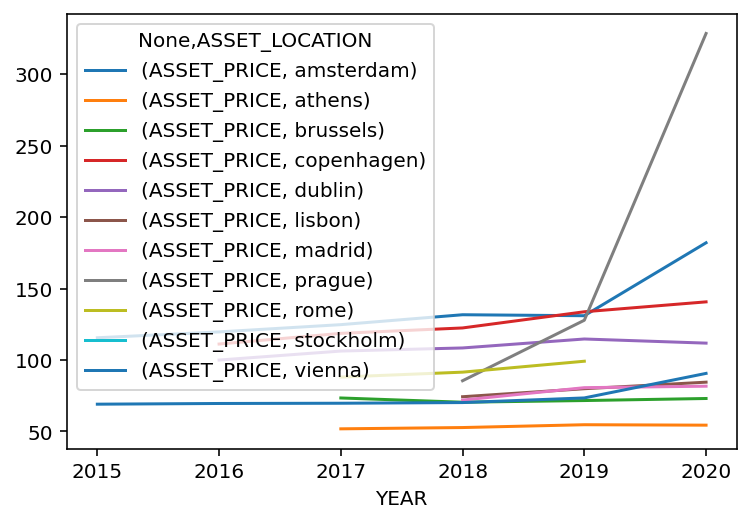

In [23]:
# df_price_rev.head()
average_price = df_price_avg.plot()

The figure above represents average price across individual cities over time. The figure shows a general increase in listing price, including a wide variation across cities.

#### Exploration -  Review score

In [24]:
df.head()

,MODEL_INSTANCE,TIME_STAMP,PARTIES_PROPOSER_ID,PARTIES_PARTICIPANT_ID,ASSET_ID,ASSET_PRICE,ASSET_MIGRATION,ASSET_LOCATION,ASSETS_REVIEW_SCORES_ACCURACY,ASSET_NUMBER_REVIEWS,ASSET_AVAILABILITY_30,YEAR,MONTH
0,PJNs4Fpyg4,2015-04-10,62142,30537860,15883,NaN,NaN,NaN,NaN,NaN,NaN,2015,4
1,rGvohKWuaC,2016-06-19,62142,37529754,15883,85.0,0.0,vienna,10.0,1.0,9.0,2016,6
2,O1ZE3GDKxL,2016-07-29,62142,3147341,15883,85.0,0.0,vienna,10.0,2.0,17.0,2016,7
3,2t2vxoLsH5,2016-08-13,62142,29518067,15883,85.0,0.0,vienna,9.0,3.0,9.0,2016,8
4,KBHJiEPuFf,2016-11-21,62142,36016357,15883,85.0,0.0,vienna,10.0,4.0,9.0,2016,11


In [25]:
# years = [2020]
# df_time = df[df.YEAR.isin(years)]

df_price_avg = pd.pivot_table(data = df,
                                 index=['YEAR'],
                                 columns = ["ASSET_LOCATION"],
                                 values=["ASSETS_REVIEW_SCORES_ACCURACY"], 
                                 aggfunc="mean",
                                 )
df_price_avg

ASSETS_REVIEW_SCORES_ACCURACY                                 \
ASSET_LOCATION                     amsterdam    athens  brussels copenhagen   
YEAR                                                                          
2015                                9.631975  9.765685  9.611260        NaN   
2016                                9.672577       NaN       NaN   9.665281   
2017                                9.725026  9.877297  9.678709   9.787964   
2018                                9.763790  9.925048  9.704145   9.794574   
2019                                9.807752  9.917424  9.745094   9.837587   
2020                                9.761891  9.900707  9.747118   9.805231   

                                                                            \
ASSET_LOCATION    dublin    lisbon    madrid    prague      rome stockholm   
YEAR                                                                         
2015                 NaN       NaN       NaN       NaN       NaN       NaN   
2016            9.639548       NaN       NaN       NaN       NaN       NaN   
2017            9.736614       NaN       NaN       NaN  9.711259       NaN   
2018            9.784627  9.759487  9.693455  9.817652  9.774656  9.855232   
2019            9.803148  9.795981  9.707772  9.826621  9.800449       NaN   
2020            9.792793  9.786411  9.675700  9.823396       NaN       NaN   

                          
ASSET_LOCATION    vienna  
YEAR                      
2015            9.636534  
2016            9.717805  
2017            9.821016  
2018            9.840382  
2019            9.861179  
2020            9.851777

In [26]:
# to check asset occupancy we need the last updated (time stamp) availability for every y/m & asset id
df_occupancy = df.sort_values(by=["ASSET_LOCATION", "YEAR", "MONTH", "ASSET_ID", "TIME_STAMP"])\
                 .groupby(["ASSET_LOCATION", "YEAR", "MONTH", "ASSET_ID"]).tail(1)

# occupancy is 30 - actual availability at the end of the month
df_occupancy['OCCUPANCY'] = 30 - df_occupancy["ASSET_AVAILABILITY_30"]

df_occupancy_gb = df_occupancy.groupby(["ASSET_LOCATION", 'YEAR', 'MONTH'])[["OCCUPANCY"]].median()

<AxesSubplot:xlabel='YEAR'>

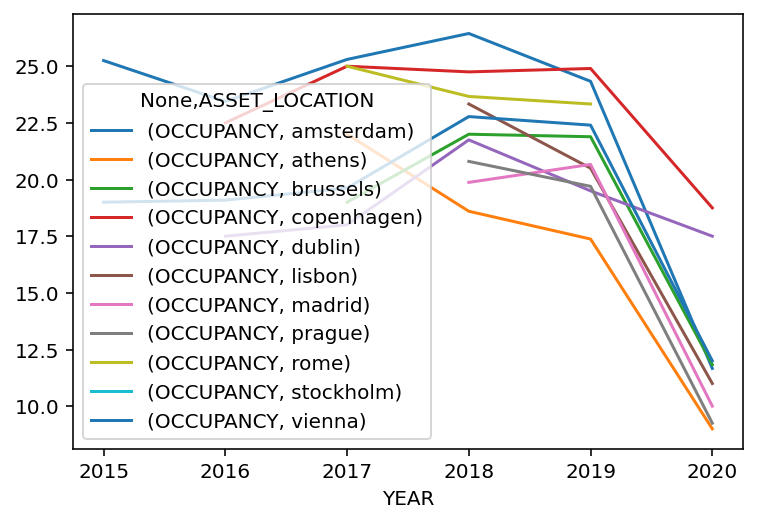

In [27]:
df_occupancy = pd.pivot_table(data = df_occupancy_gb,
                                 index=['YEAR'],
                                 columns = ["ASSET_LOCATION"],
                                 values=["OCCUPANCY"], 
                                 aggfunc="mean",
                                 )
df_occupancy.plot()

### OCCUPANCY

We define an "occupancy" variable, which is essentially given by the number of days in a month (rounded to 30) minus the listing's 30 days availabilty. This variable will indicate the average occupancy of an individual assets. As some of the listings are available only for a limited time, this is a rough estimation.

In [28]:
df.sort_values(by=["YEAR", "MONTH", "ASSET_ID", "TIME_STAMP"])[[
    "YEAR", "MONTH", "ASSET_ID", "TIME_STAMP",
    "PARTIES_PROPOSER_ID", "PARTIES_PARTICIPANT_ID",  "ASSET_AVAILABILITY_30"]].head(4)

,YEAR,MONTH,ASSET_ID,TIME_STAMP,PARTIES_PROPOSER_ID,PARTIES_PARTICIPANT_ID,ASSET_AVAILABILITY_30
3427923,2008,11,2903,2008-11-16,3280,3734,NaN
3427924,2008,11,2903,2008-11-28,3280,3726,NaN
3427925,2009,1,2903,2009-01-21,3280,5120,NaN
3427926,2009,2,2903,2009-02-23,3280,7671,NaN


In [29]:
df.sort_values(by=["YEAR", "MONTH", "ASSET_ID", "TIME_STAMP"])\
  .groupby(["YEAR", "MONTH", "ASSET_ID"]).tail(1)[["YEAR", "MONTH", "ASSET_ID", "TIME_STAMP",
    "PARTIES_PROPOSER_ID", "PARTIES_PARTICIPANT_ID",  "ASSET_AVAILABILITY_30"]].head(4)

,YEAR,MONTH,ASSET_ID,TIME_STAMP,PARTIES_PROPOSER_ID,PARTIES_PARTICIPANT_ID,ASSET_AVAILABILITY_30
3427924,2008,11,2903,2008-11-28,3280,3726,NaN
3427925,2009,1,2903,2009-01-21,3280,5120,NaN
3427926,2009,2,2903,2009-02-23,3280,7671,NaN
4610344,2009,3,2818,2009-03-30,3159,10952,NaN


In [30]:
# to check asset occupancy we need the last updated (time stamp) availability for every y/m & asset id
df_occupancy = df.sort_values(by=["ASSET_LOCATION", "YEAR", "MONTH", "ASSET_ID", "TIME_STAMP"])\
                 .groupby(["ASSET_LOCATION", "YEAR", "MONTH", "ASSET_ID"]).tail(1)

# occupancy is 30 - actual availability at the end of the month
df_occupancy['OCCUPANCY'] = 30 - df_occupancy["ASSET_AVAILABILITY_30"]

df_occupancy_gb = df_occupancy.groupby(["ASSET_LOCATION", 'YEAR', 'MONTH'])[["OCCUPANCY"]].median()

In [34]:
df_occupancy_gb.head()

OCCUPANCY
ASSET_LOCATION YEAR MONTH           
amsterdam      2015 8           28.0
                    9           27.0
                    10          25.0
                    11          21.0
               2016 1           18.0

In [32]:
df_occupancy_gb.isnull().sum()/len(df_occupancy) * 100

OCCUPANCY    0.0
dtype: float64

The figure above shows the average occupancy rate across cities over time. Occupancy is defined as 30 days minus the listing's 30 days availability. The results shows, approximately, how occupied were listings over years. 

The figure shows a wide variability in average occupancy across cities over time, with a sharp decline in the year 2020.

### New hosts joining the platform

We now analyse the number of new hosts who joined the platform over time.

In [35]:
df_gb = pd.pivot_table(data = df,
                       index=["ASSET_LOCATION", 'YEAR', 'MONTH'],
                       values=["PARTIES_PROPOSER_ID", "ASSET_ID", "MODEL_INSTANCE"], 
                       aggfunc={
                           "PARTIES_PROPOSER_ID" : "nunique", # at the same time number of contracts and reviews by definition
                           "ASSET_ID" :"nunique",
                           "MODEL_INSTANCE" : "count",
                       })[["PARTIES_PROPOSER_ID", "ASSET_ID", "MODEL_INSTANCE"]]

In [36]:
df_gb.head()

PARTIES_PROPOSER_ID  ASSET_ID  MODEL_INSTANCE
ASSET_LOCATION YEAR MONTH                                               
amsterdam      2015 8                      596       626            1807
                    9                      554       577            1696
                    10                     558       586            1698
                    11                     420       435            1179
               2016 1                      556       588            1188

In [37]:
with gzip.open(os.path.join(data_path, 'PARTIES_DOMAIN_FEATURE.csv.gzip')) as file_in:
    df_parties = pd.read_csv(file_in, low_memory=False)

In [38]:
df_parties.head(2)

,TIME_STAMP_MONTH,PARTIES_ID,HOST_NAME,HOST_SINCE,HOST_LOCATION,HOST_ABOUT,HOST_RESPONSE_TIME,HOST_RESPONCE_RATE,HOST_ACCEPTANCE_RATE,HOST_IS_SUPERHOST,HOST_LISTINGS_COUNT,HOST_HAS_PROFILE_PIC,TIME_STAMP,PARTIES_ROLE
0,2021-04,62142,Eva,2009-12-11,"Vienna, Wien, Austria",Mein größtes Hobby: Reisen! Am liebsten mit me...,NaN,NaN,100%,f,6.0,t,2021-04-15,H
1,2021-04,166283,Hannes,2010-07-14,"Vienna, Wien, Austria",I am open minded and like travelling myself. I...,within an hour,100%,98%,t,3.0,t,2021-04-15,H


G for guest, H for host

In [40]:
df_parties.PARTIES_ROLE.value_counts()

G    6196604
H    5148469
Name: PARTIES_ROLE, dtype: int64

In [41]:
# select Hosts
df_parties = df_parties[df_parties.PARTIES_ROLE == 'H']

In [42]:
df_parties_net = df_parties.drop_duplicates(subset='PARTIES_ID')[['PARTIES_ID', "HOST_SINCE"]]

In [43]:
df_parties_net.PARTIES_ID.duplicated().sum()

0

In [44]:
def fix_id (x):
    try: return(float(x))
    except : return np.nan

df_parties_net.PARTIES_ID = df_parties_net.PARTIES_ID.apply(lambda x: fix_id(x))

In [45]:
df_parties_net[df_parties_net['PARTIES_ID'].duplicated(keep=False)].sort_values(by="PARTIES_ID").head(5)

,PARTIES_ID,HOST_SINCE
10515169,513.0,2008-06-27
247366,513.0,2008-06-27
1306725,1822.0,2008-08-12
8270574,1822.0,2008-08-12
1297502,1944.0,2008-08-13


In [46]:
df_parties_net.dropna(subset=["HOST_SINCE"], inplace=True)

In [47]:
df_parties_net.drop_duplicates(inplace=True)

In [48]:
df_parties_net.dropna(subset=['PARTIES_ID'], inplace=True)

In [49]:
df_parties_net.duplicated().sum()

0

In [50]:
df_parties_net.head()

,PARTIES_ID,HOST_SINCE
0,62142.0,2009-12-11
1,166283.0,2010-07-14
3,175131.0,2010-07-20
7,358842.0,2011-01-23
9,363315.0,2011-01-26


In [51]:
df_location_net = df[["PARTIES_PROPOSER_ID", "ASSET_LOCATION"]].dropna().drop_duplicates()

In [52]:
df_location_net.PARTIES_PROPOSER_ID.duplicated().sum()

7

In [53]:
df_location_net[df_location_net.PARTIES_PROPOSER_ID.duplicated(keep=False)].sort_values(by='PARTIES_PROPOSER_ID').head(4)

,PARTIES_PROPOSER_ID,ASSET_LOCATION
4661790,4348783,amsterdam
6279285,4348783,madrid
443091,5056483,brussels
3538455,5056483,rome


In [54]:
df_host_since = df_parties_net.merge(df_location_net, 
                                     left_on="PARTIES_ID", 
                                     right_on='PARTIES_PROPOSER_ID', 
                                     how="inner")[["PARTIES_PROPOSER_ID", "HOST_SINCE", "ASSET_LOCATION"]]

In [55]:
df_host_since.PARTIES_PROPOSER_ID.duplicated().sum()

7

In [56]:
df_host_since[df_host_since.PARTIES_PROPOSER_ID.duplicated(keep=False)].sort_values(by='PARTIES_PROPOSER_ID').head(10)

,PARTIES_PROPOSER_ID,HOST_SINCE,ASSET_LOCATION
16887,4348783,2012-12-07,amsterdam
16888,4348783,2012-12-07,madrid
3040,5056483,2013-02-12,brussels
3041,5056483,2013-02-12,rome
3033,7922860,2013-08-04,brussels
3034,7922860,2013-08-04,dublin
28459,9435259,2013-10-15,brussels
28460,9435259,2013-10-15,amsterdam
2878,26740273,2015-01-26,brussels
2879,26740273,2015-01-26,madrid


In [57]:
df_host_since['HOST_SINCE'] = pd.to_datetime(df_host_since['HOST_SINCE'])
df_host_since['YEAR'] = df_host_since['HOST_SINCE'].dt.year
df_host_since['MONTH'] = df_host_since['HOST_SINCE'].dt.month

In [58]:
df_host_since.head()

,PARTIES_PROPOSER_ID,HOST_SINCE,ASSET_LOCATION,YEAR,MONTH
0,62142,2009-12-11,vienna,2009,12
1,166283,2010-07-14,vienna,2010,7
2,175131,2010-07-20,vienna,2010,7
3,358842,2011-01-23,vienna,2011,1
4,363315,2011-01-26,vienna,2011,1


In [59]:
df_host_since.pivot_table(index=['YEAR', 'MONTH'], columns='ASSET_LOCATION', values="PARTIES_PROPOSER_ID", aggfunc='count').head()

ASSET_LOCATION  amsterdam  athens  brussels  copenhagen  dublin  lisbon  \
YEAR MONTH                                                                
2008 8                NaN     NaN       1.0         NaN     NaN     NaN   
     9                1.0     NaN       NaN         NaN     NaN     NaN   
     10               NaN     NaN       NaN         NaN     NaN     NaN   
     12               NaN     NaN       NaN         NaN     NaN     NaN   
2009 2                1.0     NaN       NaN         NaN     NaN     NaN   

ASSET_LOCATION  madrid  prague  rome  stockholm  vienna  
YEAR MONTH                                               
2008 8             NaN     NaN   4.0        NaN     NaN  
     9             NaN     NaN   1.0        NaN     NaN  
     10            NaN     NaN   1.0        NaN     NaN  
     12            NaN     1.0   NaN        NaN     NaN  
2009 2             NaN     NaN   NaN        NaN     NaN

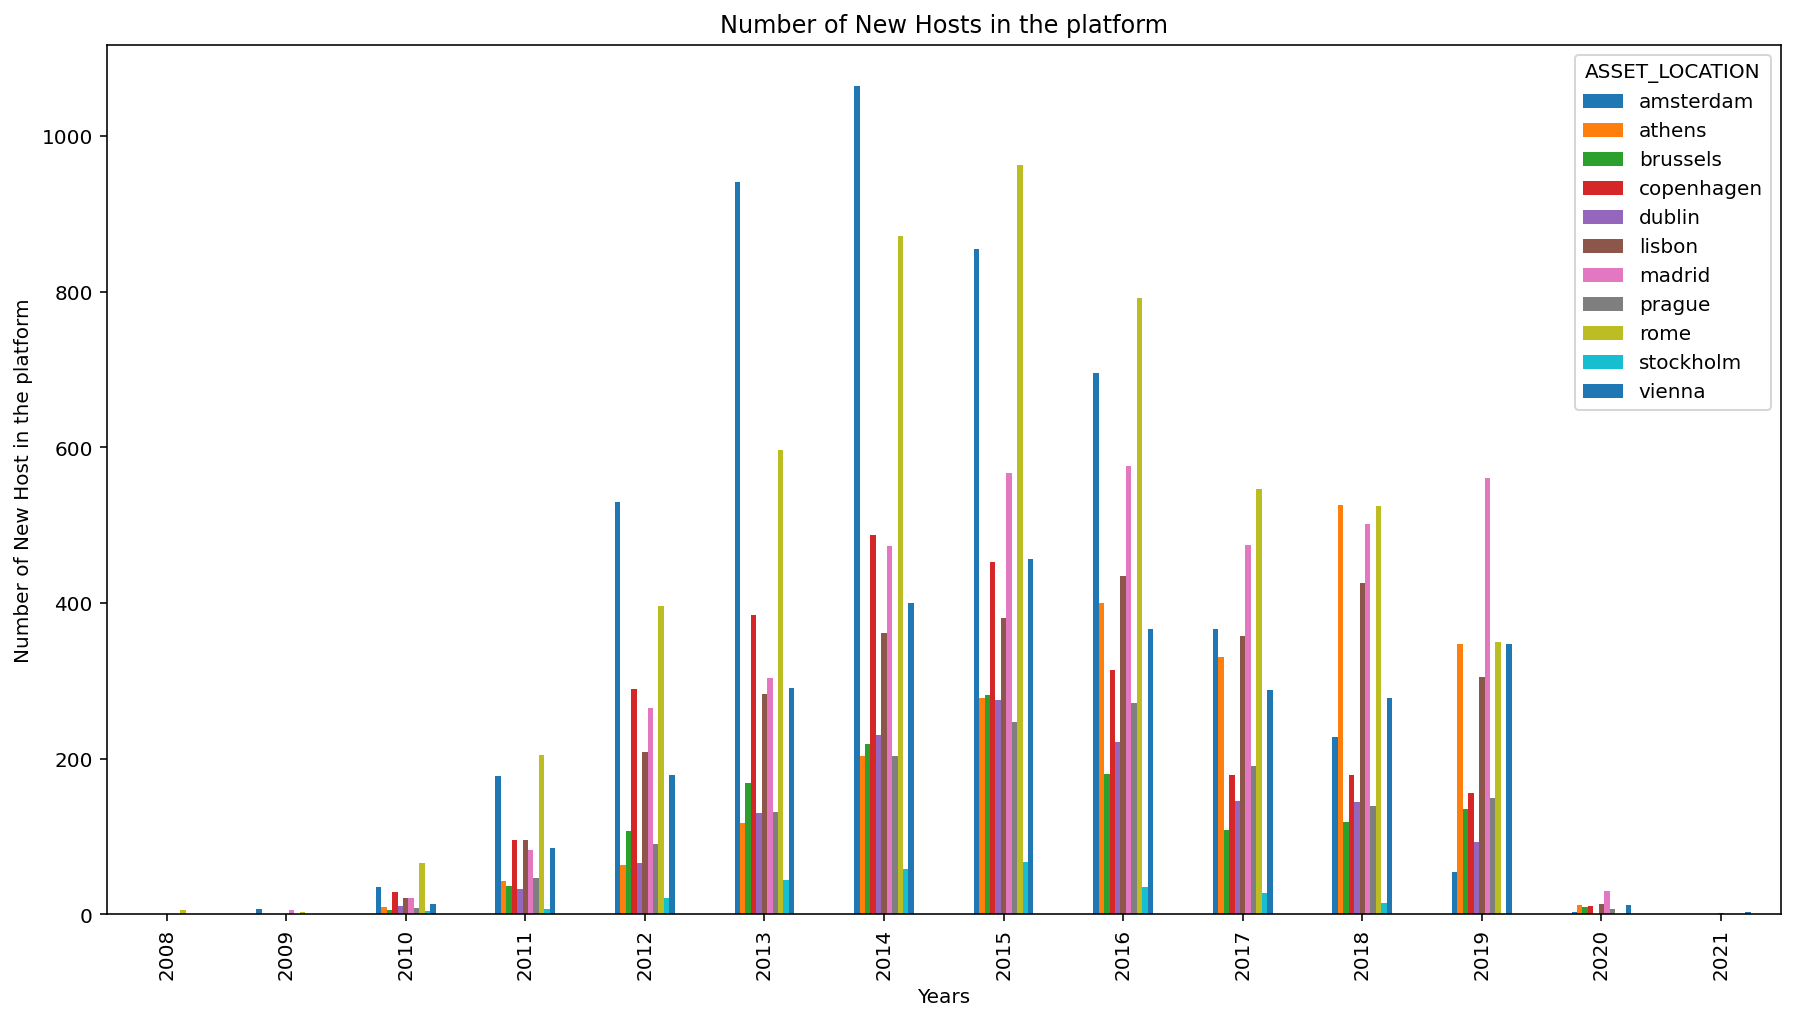

In [57]:
# Plot a bar chart using the DF
ax = df_host_since.pivot_table(index=['YEAR'], columns='ASSET_LOCATION', values="PARTIES_PROPOSER_ID", aggfunc='count').plot(kind="bar")
plt.title('Number of New Hosts in the platform')
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15, 8)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Number of New Host in the platform")
fig.show()

The figure shows the number of new hosts entering the digital platform per city and over time. The figure shows an overall increase in the number of new hosts until the year 2016. The following appeared to have reached a plateau in the number of new hosts in the period 2017-2019.  

The number of new hosts stalled following the spread of the pandemic in the years 2020 and 2021. The figure also shows a wide variation in the number of new hosts across individual cities and over time.

#### Exploration -  Correlations
We check for potential correlation in the number of contracts and the number of new hosts over time. for simplicity, the analysis below is reported for Amsterdam only.

In [60]:
def correlation_plot(df, feature1, feature2):
    fig,ax = plt.subplots(figsize=(25, 10))
    
    corr = round(df[feature1].corr(df[feature2]), 2)
    plt.title('Correlation between {0} and {1}: {2}'.format(feature1, feature2, corr), fontsize=20)
    
    ax.plot(df.index, df[feature1], color="blue", marker='o', label=feature1)
    plt.xticks(df.index, fontsize=12, rotation= 30)
    ax.legend(loc=2, fontsize=14)

    ax2=ax.twinx()
    ax2.plot(df.index, df[feature2], color="green", ls='--', marker='o', label=feature2)
    ax2.legend(loc=0, fontsize=14)
    
    return plt

In [61]:
location = 'amsterdam'

In [62]:
df_gb_flat = df_gb.reset_index()
#df_gb_flat = df_gb_flat[(df_gb_flat.YEAR >= 2016) & (df_gb_flat.YEAR < 2020)]
df_gb_flat['dt_index'] = pd.to_datetime(df_gb_flat.YEAR.astype(str) + "-" + df_gb_flat.MONTH.astype(str)).dt.strftime('%Y-%m')

In [63]:
df_gb_flat.set_index("dt_index", inplace=True)
#df_gb_flat.drop(["YEAR", "MONTH"], axis=1, inplace=True)

In [64]:
deco = {"PARTIES_PROPOSER_ID" : 'HOST_NUMBER',
        "ASSET_ID" : 'ASSET_NUMBER',
        "MODEL_INSTANCE" : "CONTRACT_REVIEWS_NUMBER"}

df_gb_flat.rename(columns=deco, inplace=True)

In [65]:
df_gb_flat['ASSET_PER_HOST'] = (df_gb_flat['ASSET_NUMBER'] / df_gb_flat['HOST_NUMBER']).round(2)

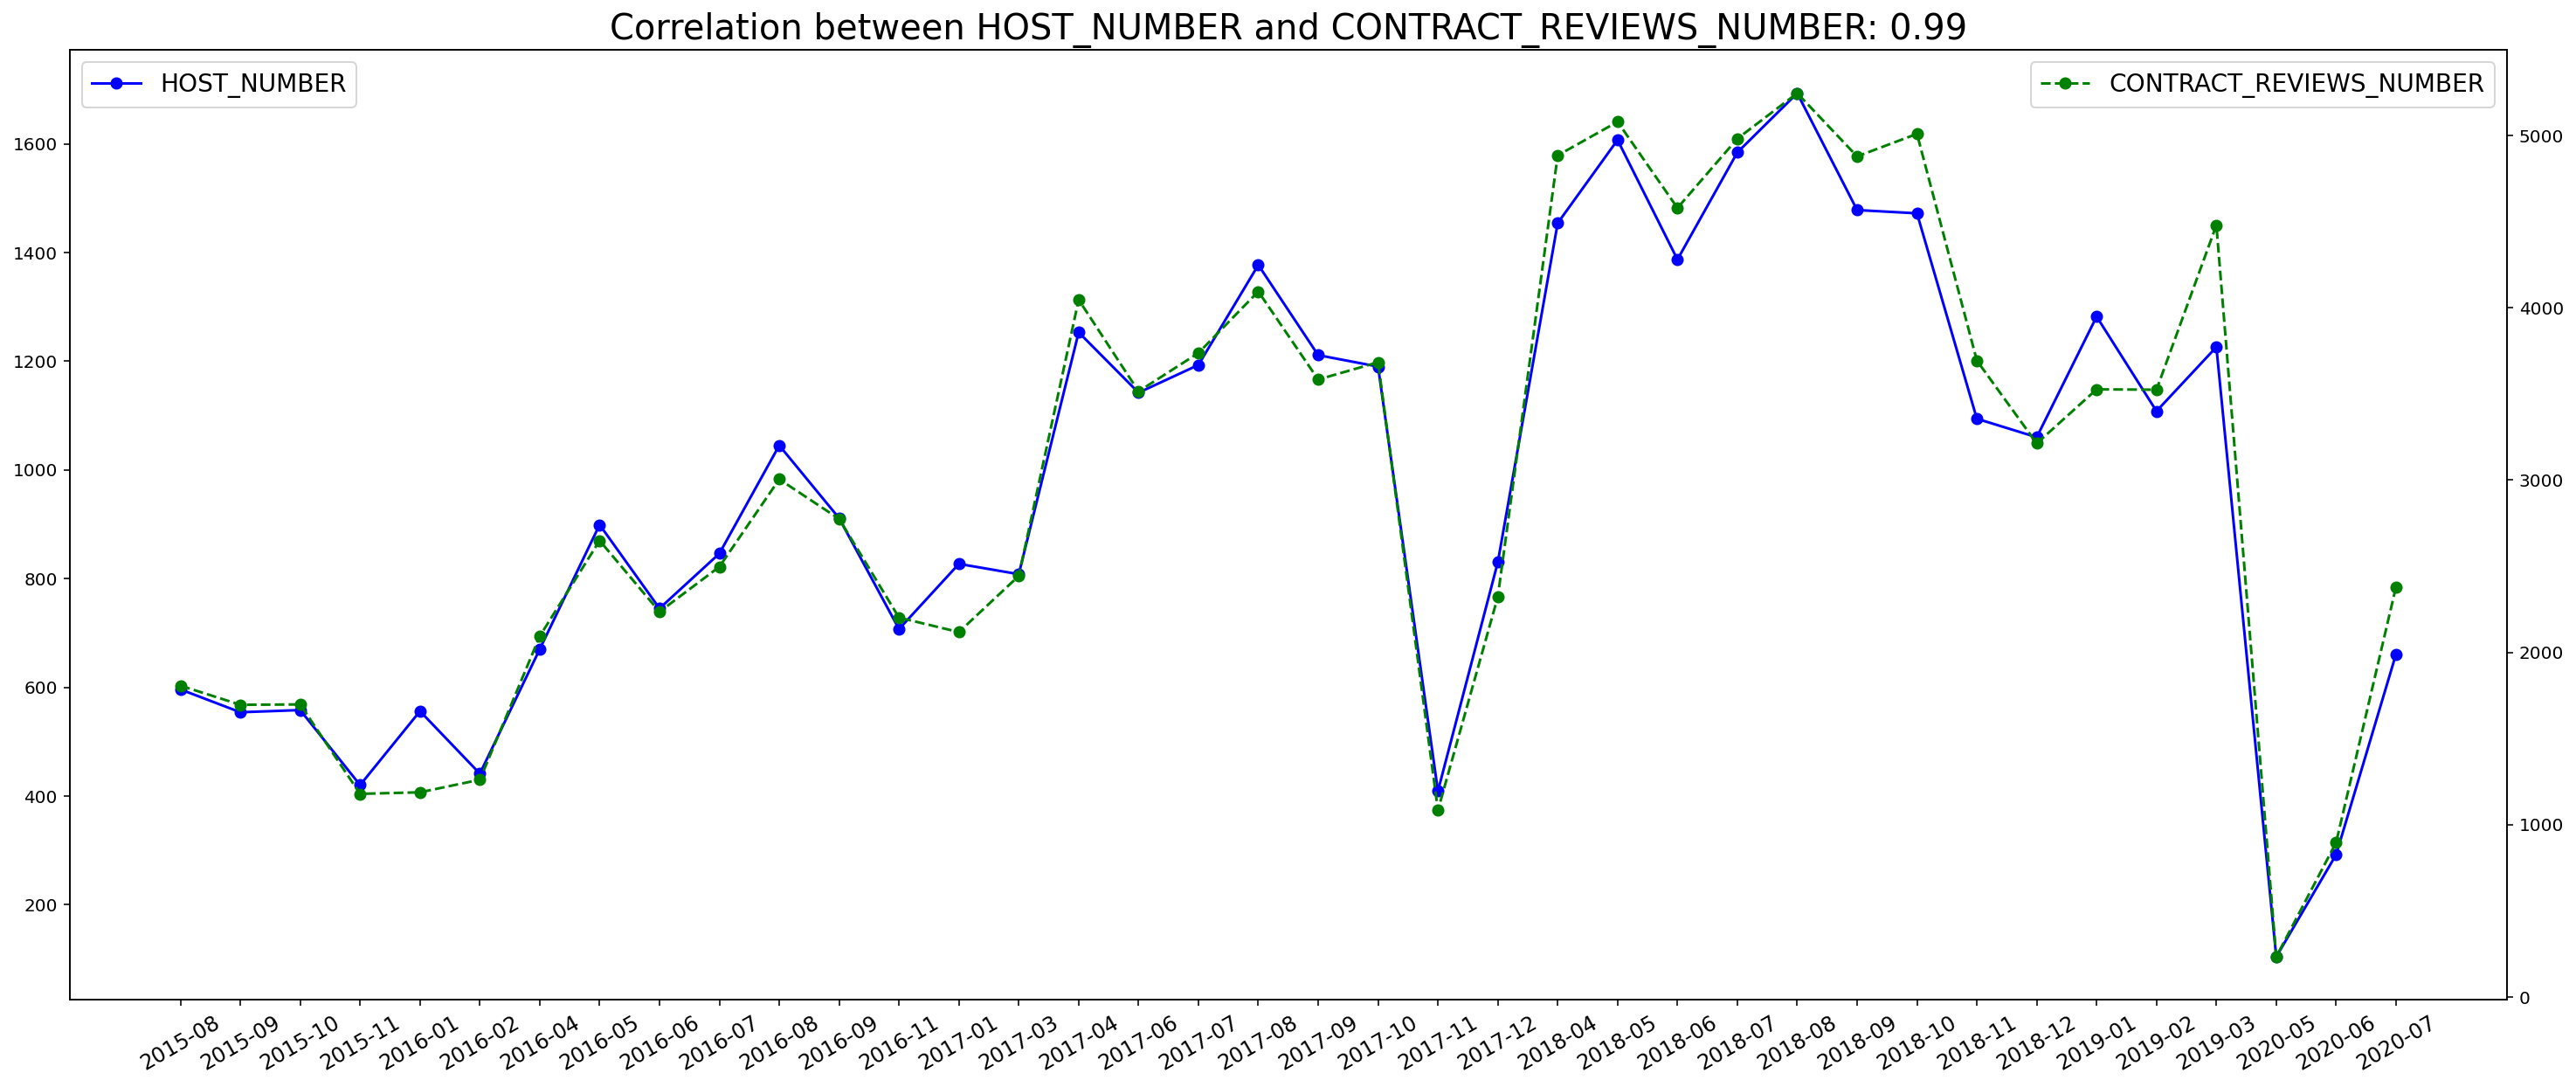

In [66]:
correlation_plot(df=df_gb_flat[df_gb_flat.ASSET_LOCATION == location],
                 feature1="HOST_NUMBER", feature2="CONTRACT_REVIEWS_NUMBER").show()